### Import Statements

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

### 1. Dataset Overview:

#### Load the Fashion MNIST Dataset

In [2]:
# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert class labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

4422102/4422102 [==============================] - 0s 0us/step


#### Display some images

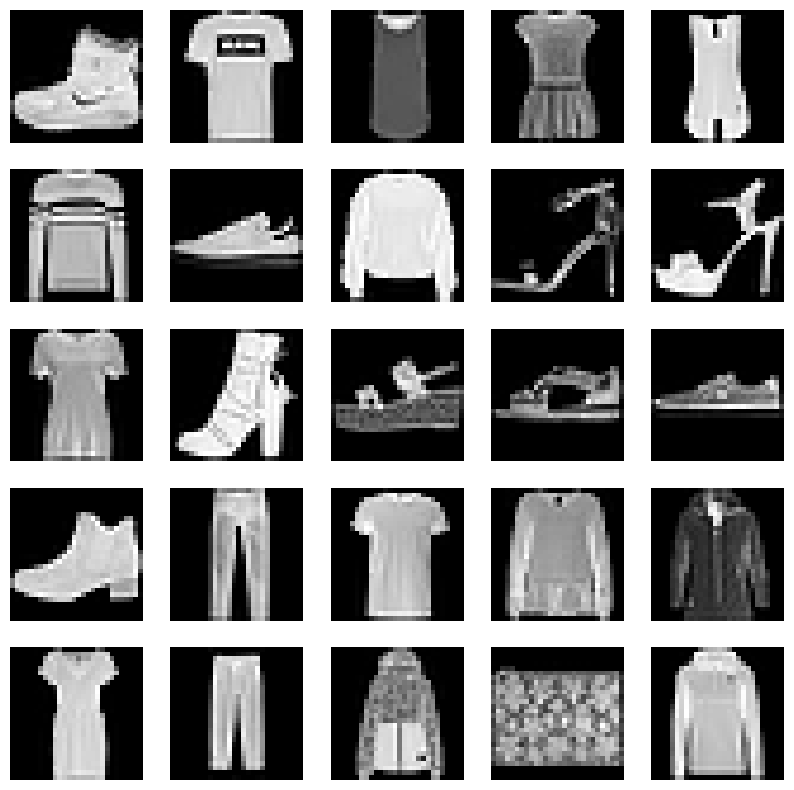

In [3]:
# Plot some sample images from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

### 2. Model Architecture:

### Kernel SIze = (3,3)

In [4]:
model_1 = Sequential([
    # 3 CONV layers with Pooling Layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Flatten Layer
    Flatten(),

    # Fully Connected Layer (Dense Layer)
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout layer
    Dense(10,  activation='softmax')
])

# Compile the model
model_1.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Kernel Size = (5,5)

In [5]:
model_2 = Sequential([
    # 3 CONV layers with Pooling Layers
    Conv2D(32, (2, 2), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (2, 2), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (2, 2), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Flatten Layer
    Flatten(),

    # Fully Connected Layer (Dense Layer)
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout layer
    Dense(10,  activation='softmax')
])

# Compile the model
model_2.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Early Stopping: Realization Techniques

In [6]:
# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

### 3. Model Training:

#### Model 1

In [7]:
# Train the model 1
history_1 = model_1.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/20
938/938 [==============================] - 18s 18ms/step - loss: 0.5458 - accuracy: 0.8080 - val_loss: 0.4435 - val_accuracy: 0.8290
Epoch 2/20
938/938 [==============================] - 16s 17ms/step - loss: 0.3725 - accuracy: 0.8665 - val_loss: 0.4064 - val_accuracy: 0.8496
Epoch 3/20
938/938 [==============================] - 16s 17ms/step - loss: 0.3252 - accuracy: 0.8824 - val_loss: 0.3783 - val_accuracy: 0.8593
Epoch 4/20
938/938 [==============================] - 16s 17ms/step - loss: 0.2901 - accuracy: 0.8946 - val_loss: 0.3424 - val_accuracy: 0.8721
Epoch 5/20
938/938 [==============================] - 16s 17ms/step - loss: 0.2707 - accuracy: 0.9008 - val_loss: 0.3171 - val_accuracy: 0.8870
Epoch 6/20
938/938 [==============================] - 16s 17ms/step - loss: 0.2481 - accuracy: 0.9081 - val_loss: 0.3264 - val_accuracy: 0.8784
Epoch 7/20
938/938 [==============================] - 16s 17ms/step - loss: 0.2323 - accuracy: 0.9137 - val_loss: 0.4094 - val_accuracy:

#### Model 2

In [8]:
# Train the model 2
history_2 = model_2.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/20
938/938 [==============================] - 20s 19ms/step - loss: 0.5531 - accuracy: 0.8038 - val_loss: 0.4349 - val_accuracy: 0.8344
Epoch 2/20
938/938 [==============================] - 18s 19ms/step - loss: 0.3853 - accuracy: 0.8586 - val_loss: 0.3912 - val_accuracy: 0.8488
Epoch 3/20
938/938 [==============================] - 18s 19ms/step - loss: 0.3384 - accuracy: 0.8768 - val_loss: 0.4938 - val_accuracy: 0.8350
Epoch 4/20
938/938 [==============================] - 18s 19ms/step - loss: 0.3094 - accuracy: 0.8868 - val_loss: 0.3645 - val_accuracy: 0.8608
Epoch 5/20
938/938 [==============================] - 18s 19ms/step - loss: 0.2858 - accuracy: 0.8949 - val_loss: 0.3464 - val_accuracy: 0.8711
Epoch 6/20
938/938 [==============================] - 18s 19ms/step - loss: 0.2729 - accuracy: 0.8985 - val_loss: 0.2998 - val_accuracy: 0.8919
Epoch 7/20
938/938 [==============================] - 18s 19ms/step - loss: 0.2594 - accuracy: 0.9049 - val_loss: 0.2980 - val_accuracy:

### 4. Evaluation:

#### Model 1

In [9]:
# Evaluate the model on the test set
test_loss_1, test_acc_1 = model_1.evaluate(x_test, y_test)
print('Test accuracy:', test_acc_1)
print('Test loss:', test_loss_1)

313/313 [==============================] - 1s 4ms/step - loss: 0.3380 - accuracy: 0.8912
Test accuracy: 0.8912000060081482
Test loss: 0.3380482494831085


#### Model 2

In [10]:
# Evaluate the model on the test set
test_loss_2, test_acc_2 = model_2.evaluate(x_test, y_test)
print('Test accuracy:', test_acc_2)
print('Test loss:', test_loss_2)

313/313 [==============================] - 1s 4ms/step - loss: 0.2967 - accuracy: 0.9023
Test accuracy: 0.9023000001907349
Test loss: 0.29665347933769226


#### Plotting Model 1

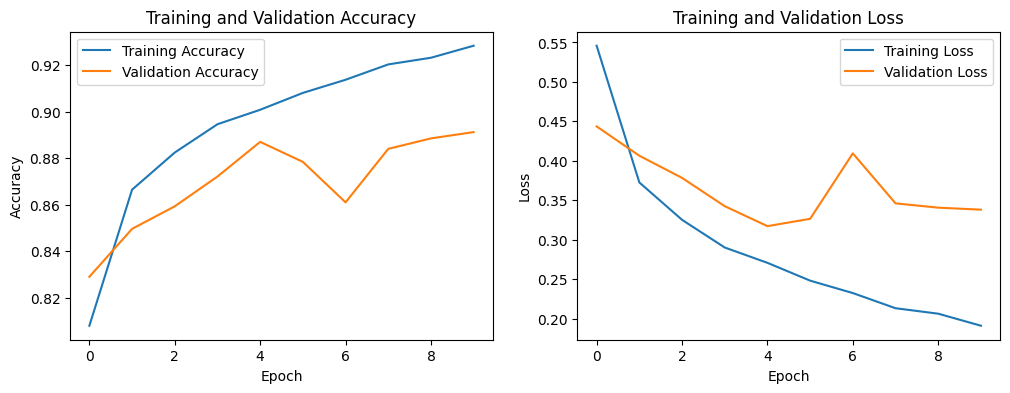

In [11]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Plotting Model 2

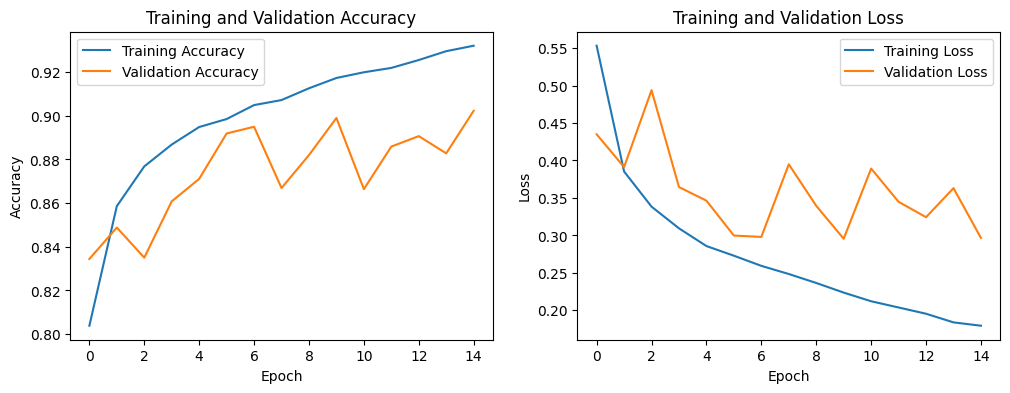

In [12]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()